<a href="https://colab.research.google.com/github/ChonnaveeSuk/intro-Data-Science-KMUTNB/blob/main/HW2_USAHousing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Data
USAhousing=pd.read_csv('USA_Housing.csv')

In [ ]:
#Checking null and data type
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
USAhousing.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
#Test Train Split
X=USAhousing.drop(["Address","Price"],axis=1)
y=USAhousing["Price"]

In [ ]:
X.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [ ]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [ ]:
#For information about models: https://scikit-learn.org/stable/modules/linear_model.html
lm=LinearRegression()
by=BayesianRidge()
ard=ARDRegression()
ls=Lasso()
rid=Ridge()
els=ElasticNet()

In [ ]:
lm.fit(X_train,y_train)
by.fit(X_train,y_train)
ard.fit(X_train,y_train)
ls.fit(X_train,y_train)
rid.fit(X_train,y_train)
els.fit(X_train,y_train)

ElasticNet()

In [ ]:
#Coefficients dataframe
coeff_df=pd.DataFrame(lm.coef_,X.columns,columns=["Lineer Regression"])
coeff_df["BayesianRidge"]=by.coef_
coeff_df["ARDRegression"]=ard.coef_
coeff_df["Lasso"]=ls.coef_
coeff_df["Ridge"]=rid.coef_
coeff_df["ElasticNet"]=els.coef_
coeff_df

,Lineer Regression,BayesianRidge,ARDRegression,Lasso,Ridge,ElasticNet
Avg. Area Income,21.617635,21.445298,21.617338,21.617634,21.617575,21.556739
Avg. Area House Age,165221.119872,3.895001,165250.210196,165220.081707,165170.958745,108050.064535
Avg. Area Number of Rooms,121405.376596,3.005927,122131.536269,121404.564315,121360.426393,75664.208805
Avg. Area Number of Bedrooms,1318.718783,1.889718,0.000512,1318.385182,1336.457015,14846.359233
Area Population,15.225196,15.328010,15.218440,15.225195,15.225291,15.306981


In [ ]:
predictions=lm.predict(X_test)
predictions_by=by.predict(X_test)
predictions_ard=ard.predict(X_test)
predictions_ls=ls.predict(X_test)
predictions_rid=rid.predict(X_test)
predictions_els=els.predict(X_test)

Text(0.5, 1.0, 'ElasticNet')

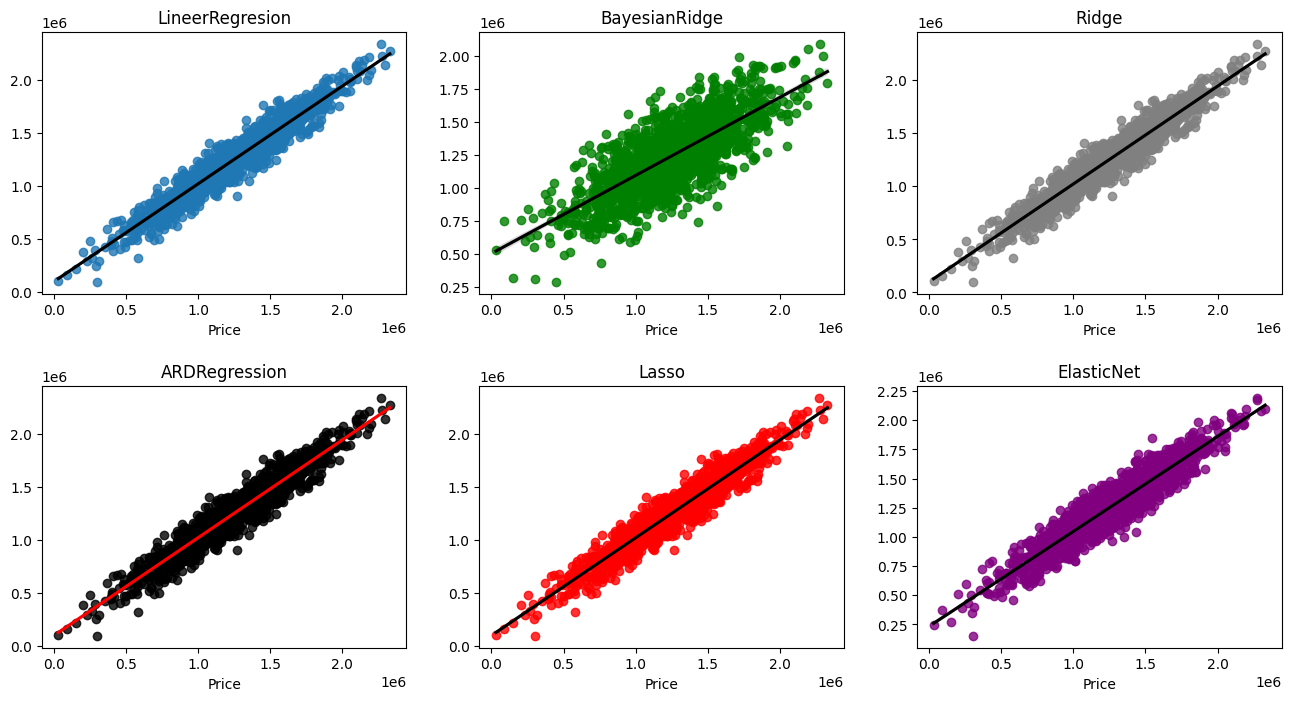

In [ ]:
#Regplots of models
fig, axs = plt.subplots(ncols=3,nrows=2)
fig.set_figheight(8)
fig.set_figwidth(16)
fig.subplots_adjust(hspace=0.35)
sns.regplot(x=y_test,y=predictions,ax=axs[0,0],line_kws={"color":"black"})
axs[0, 0].set_title('LineerRegresion')
sns.regplot(x=y_test,y=predictions_by,color="green",ax=axs[0,1],line_kws={"color":"black"})
axs[0, 1].set_title('BayesianRidge')
sns.regplot(x=y_test,y=predictions_ard,color="gray",ax=axs[0,2],line_kws={"color":"black"})
axs[1, 0].set_title('ARDRegression')
sns.regplot(x=y_test,y=predictions_ls,color="black",ax=axs[1,0],line_kws={"color":"red"})
axs[1, 1].set_title('Lasso')
sns.regplot(x=y_test,y=predictions_rid,color="red",ax=axs[1,1],line_kws={"color":"black"})
axs[0, 2].set_title('Ridge')
sns.regplot(x=y_test,y=predictions_els,color="purple",ax=axs[1,2],line_kws={"color":"black"})
axs[1, 2].set_title('ElasticNet')

<Figure size 1200x800 with 0 Axes>

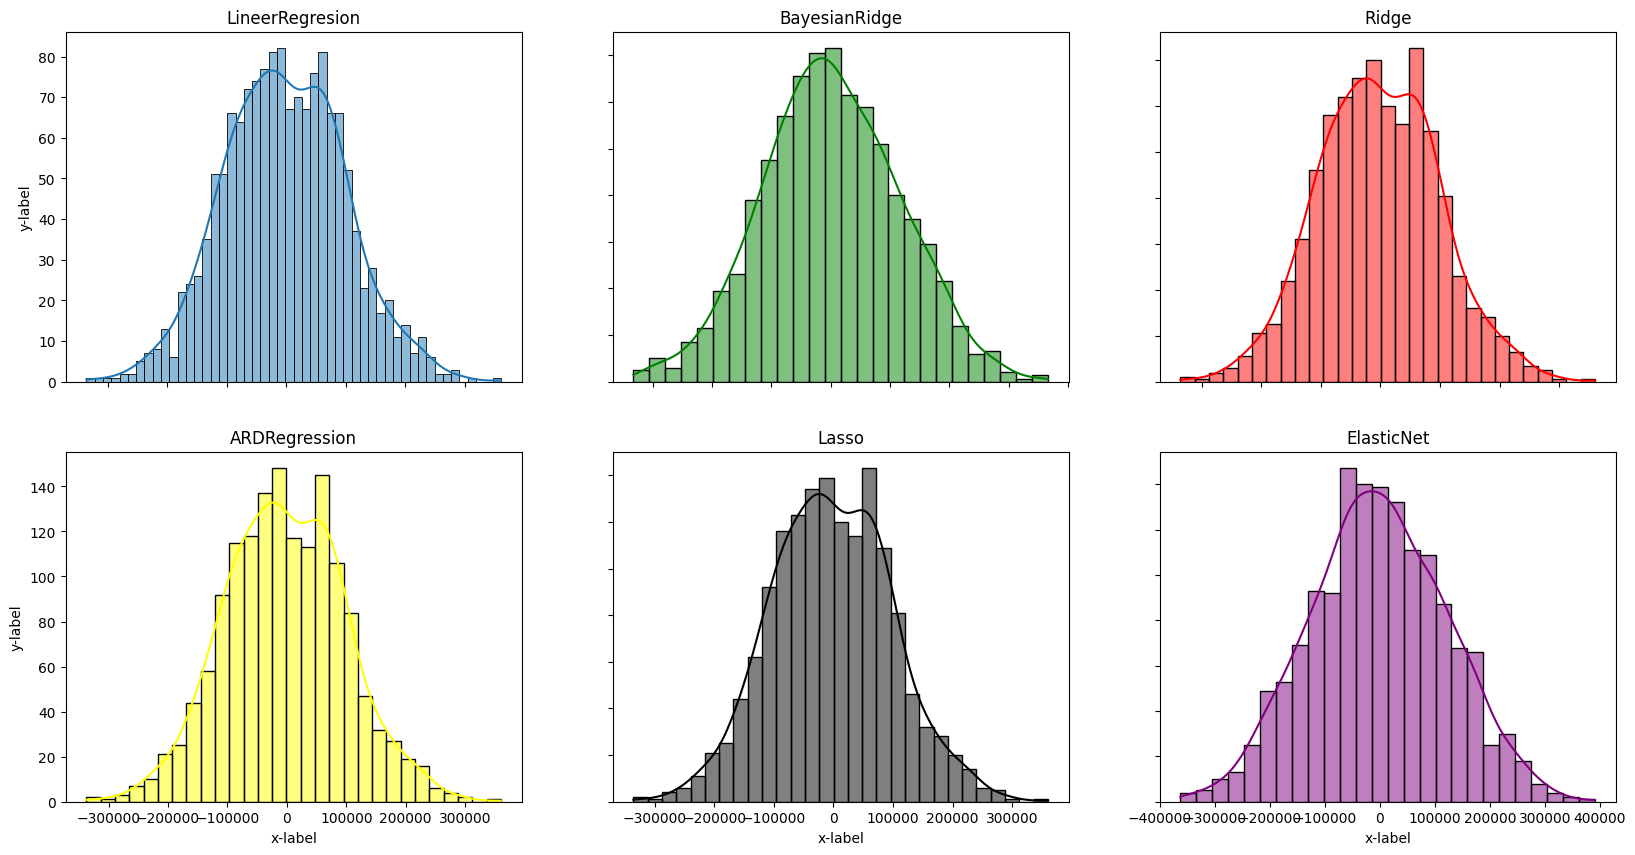

In [ ]:
#Error_histograms
plt.figure(figsize=(12,8))
fig, axs = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(20)
sns.histplot((y_test-predictions),kde=True,bins=50,ax=axs[0, 0])
axs[0, 0].set_title('LineerRegresion')
sns.histplot(y_test-predictions_by,color="green",kde=True,ax=axs[0, 1])
axs[0, 1].set_title('BayesianRidge')
sns.histplot(y_test-predictions_ard,color="yellow",kde=True,ax=axs[1, 0])
axs[1, 0].set_title('ARDRegression')
sns.histplot(y_test-predictions_ls,color="black",kde=True,ax=axs[1, 1])
axs[1, 1].set_title('Lasso')
sns.histplot(y_test-predictions_rid,color="red",kde=True,ax=axs[0, 2])
axs[0, 2].set_title('Ridge')
sns.histplot(y_test-predictions_els,color="purple",kde=True,ax=axs[1, 2])
axs[1, 2].set_title('ElasticNet')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
#Metrics (MAE, MSE, RMSE)
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MAElog:', np.log1p(metrics.mean_absolute_error(y_test, predictions)))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('MSElog:', np.log1p(metrics.mean_squared_error(y_test, predictions)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('RMSElog:', np.log1p(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 81257.55795855941
MAElog: 11.305391423366036
MSE: 10169125565.897606
MSElog: 23.042622061687595
RMSE: 100842.08231635048
RMSElog: 11.52132094724041


In [ ]:
#Creating error dataframe
index=["LineerRegression",	"BayesianRidge","ARDRegression","Lasso","Ridge","ElasticNet"]
columns=[["MAE","MAElog","MSE","MSElog","RMSE","RMSElog"]]
error_df=pd.DataFrame(columns=columns,index=index)
error_df


,MAE,MAElog,MSE,MSElog,RMSE,RMSElog
LineerRegression,NaN,NaN,NaN,NaN,NaN,NaN
BayesianRidge,NaN,NaN,NaN,NaN,NaN,NaN
ARDRegression,NaN,NaN,NaN,NaN,NaN,NaN
Lasso,NaN,NaN,NaN,NaN,NaN,NaN
Ridge,NaN,NaN,NaN,NaN,NaN,NaN
ElasticNet,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
error_df.loc["LineerRegression","MAE"]= metrics.mean_absolute_error(y_test, predictions)
error_df.loc["LineerRegression","MAElog"]= np.log1p(metrics.mean_absolute_error(y_test, predictions))
error_df.loc["LineerRegression",'MSE']=metrics.mean_squared_error(y_test, predictions)
error_df.loc["LineerRegression",'MSElog'] = np.log1p(metrics.mean_squared_error(y_test, predictions))
error_df.loc["LineerRegression",'RMSE'] = np.sqrt(metrics.mean_squared_error(y_test, predictions))
error_df.loc["LineerRegression",'RMSElog'] = np.log1p(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
error_df.loc["BayesianRidge","MAE"]= metrics.mean_absolute_error(y_test, predictions_by)
error_df.loc["BayesianRidge","MAElog"]= np.log1p(metrics.mean_absolute_error(y_test, predictions_by))
error_df.loc["BayesianRidge",'MSE']=metrics.mean_squared_error(y_test, predictions_by)
error_df.loc["BayesianRidge",'MSElog'] = np.log1p(metrics.mean_squared_error(y_test, predictions_by))
error_df.loc["BayesianRidge",'RMSE'] = np.sqrt(metrics.mean_squared_error(y_test, predictions_by))
error_df.loc["BayesianRidge",'RMSElog'] = np.log1p(np.sqrt(metrics.mean_squared_error(y_test, predictions_by)))

In [ ]:
error_df.loc["ARDRegression","MAE"]= metrics.mean_absolute_error(y_test, predictions_ard)
error_df.loc["ARDRegression","MAElog"]= np.log1p(metrics.mean_absolute_error(y_test, predictions_ard))
error_df.loc["ARDRegression",'MSE']=metrics.mean_squared_error(y_test, predictions_ard)
error_df.loc["ARDRegression",'MSElog'] = np.log1p(metrics.mean_squared_error(y_test, predictions_ard))
error_df.loc["ARDRegression",'RMSE'] = np.sqrt(metrics.mean_squared_error(y_test, predictions_ard))
error_df.loc["ARDRegression",'RMSElog'] = np.log1p(np.sqrt(metrics.mean_squared_error(y_test, predictions_ard)))

In [ ]:
error_df.loc["Lasso","MAE"]= metrics.mean_absolute_error(y_test, predictions_ls)
error_df.loc["Lasso","MAElog"]= np.log1p(metrics.mean_absolute_error(y_test, predictions_ls))
error_df.loc["Lasso",'MSE']=metrics.mean_squared_error(y_test, predictions_ls)
error_df.loc["Lasso",'MSElog'] = np.log1p(metrics.mean_squared_error(y_test, predictions_ls))
error_df.loc["Lasso",'RMSE'] = np.sqrt(metrics.mean_squared_error(y_test, predictions_ls))
error_df.loc["Lasso",'RMSElog'] = np.log1p(np.sqrt(metrics.mean_squared_error(y_test, predictions_ls)))

In [ ]:
error_df.loc["Ridge","MAE"]= metrics.mean_absolute_error(y_test, predictions_rid)
error_df.loc["Ridge","MAElog"]= np.log1p(metrics.mean_absolute_error(y_test, predictions_rid))
error_df.loc["Ridge",'MSE']=metrics.mean_squared_error(y_test, predictions_rid)
error_df.loc["Ridge",'MSElog'] = np.log1p(metrics.mean_squared_error(y_test, predictions_rid))
error_df.loc["Ridge",'RMSE'] = np.sqrt(metrics.mean_squared_error(y_test, predictions_rid))
error_df.loc["Ridge",'RMSElog'] = np.log1p(np.sqrt(metrics.mean_squared_error(y_test, predictions_rid)))

In [ ]:
error_df.loc["ElasticNet","MAE"]= metrics.mean_absolute_error(y_test, predictions_els)
error_df.loc["ElasticNet","MAElog"]= np.log1p(metrics.mean_absolute_error(y_test, predictions_els))
error_df.loc["ElasticNet",'MSE']=metrics.mean_squared_error(y_test, predictions_els)
error_df.loc["ElasticNet",'MSElog'] = np.log1p(metrics.mean_squared_error(y_test, predictions_els))
error_df.loc["ElasticNet",'RMSE'] = np.sqrt(metrics.mean_squared_error(y_test, predictions_els))
error_df.loc["ElasticNet",'RMSElog'] = np.log1p(np.sqrt(metrics.mean_squared_error(y_test, predictions_els)))

In [ ]:
#Error dataframe
error_df

,MAE,MAElog,MSE,MSElog,RMSE,RMSElog
LineerRegression,81257.557959,11.305391,10169125565.897606,23.042622,100842.082316,11.521321
BayesianRidge,184339.375632,12.124539,53310750034.669312,24.699404,230891.208223,12.349706
ARDRegression,81268.031969,11.30552,10174330286.503799,23.043134,100867.885308,11.521577
Lasso,81257.556083,11.305391,10169125493.097183,23.042622,100842.081955,11.521321
Ridge,81257.816229,11.305395,10169092323.520142,23.042619,100841.917492,11.521319
ElasticNet,99319.123067,11.506103,15261606240.976765,23.448606,123537.873711,11.724311
